# Cotton Leaf Disease Detection

In [ ]:
!nvidia-smi

Sat Jul  2 17:15:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/1st_dataset_cotton/cotton_224x224_split.zip

Archive:  /content/drive/MyDrive/1st_dataset_cotton/cotton_224x224_split.zip
   creating: cotton_224x224_split/
   creating: cotton_224x224_split/test/
   creating: cotton_224x224_split/test/bacterial_blight/
  inflating: cotton_224x224_split/test/bacterial_blight/bact1.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact107.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact108.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact11.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact110.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact142.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact145.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact15.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact154.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact167.png  
  inflating: cotton_224x224_split/test/bacterial_blight/bact175.png  
  inflating: cotton_224x2

## Importing the Libraries

In [ ]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

## Importing the Dataset

In [ ]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/cotton_224x224_split/train'
valid_path = '/content/cotton_224x224_split/val'

#### Inception V3

In [ ]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Folders in the Training Set
folders = glob('/content/cotton_224x224_split/test/*')
folders

['/content/cotton_224x224_split/test/fussarium_wilt',
 '/content/cotton_224x224_split/test/bacterial_blight',
 '/content/cotton_224x224_split/test/healthy',
 '/content/cotton_224x224_split/test/curl_virus']

In [ ]:
len(folders)

4

In [ ]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Training Generator
training_set = train_datagen.flow_from_directory('/content/cotton_224x224_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1400 images belonging to 4 classes.


In [ ]:
# Testing Generator
test_set = test_datagen.flow_from_directory('/content/cotton_224x224_split/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 175 images belonging to 4 classes.


In [ ]:
test_set_len=175
batch_size=32

In [ ]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
44/44 [==============================] - 37s 482ms/step - loss: 2.5505 - accuracy: 0.7257 - val_loss: 0.5360 - val_accuracy: 0.9257
Epoch 2/10
44/44 [==============================] - 19s 424ms/step - loss: 0.3177 - accuracy: 0.9300 - val_loss: 0.2842 - val_accuracy: 0.9543
Epoch 3/10
44/44 [==============================] - 19s 421ms/step - loss: 0.2403 - accuracy: 0.9443 - val_loss: 0.3703 - val_accuracy: 0.9371
Epoch 4/10
44/44 [==============================] - 18s 419ms/step - loss: 0.2167 - accuracy: 0.9464 - val_loss: 0.2842 - val_accuracy: 0.9657
Epoch 5/10
44/44 [==============================] - 18s 419ms/step - loss: 0.3466 - accuracy: 0.9300 - val_loss: 0.4610 - val_accuracy: 0.9429
Epoch 6/10
44/44 [==============================] - 19s 421ms/step - loss: 0.1735 - accuracy: 0.9650 - val_loss: 0.3637 - val_accuracy: 0.9657
Epoch 7/10
44/44 [==============================] - 19s 421ms/step - loss: 0.0960 - accuracy: 0.9750 - val_loss: 0.2868 - val_accuracy: 0.9771

## Visualize the model training by plotting Loss Function and Accuracy

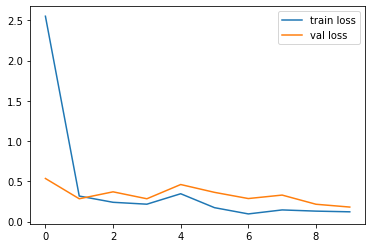

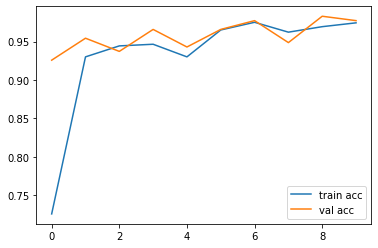

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
li=['bacterial_blight', 'curl_virus', 'fussarium_wilt', 'healthy']

Following is our prediction:


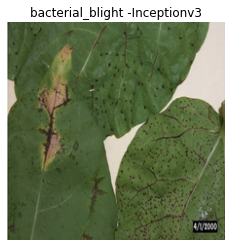

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/cotton_224x224_split/test/bacterial_blight/bact1.png"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name+ " -Inceptionv3")
plt.show()

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[1.83875964e-18, 3.26928010e-16, 1.00000000e+00, 3.55928620e-11],
       [2.95898530e-15, 1.00000000e+00, 5.24797106e-21, 2.74613470e-12],
       [3.66281085e-07, 5.41463745e-14, 7.84358781e-06, 9.99991775e-01],
       [6.03326720e-19, 1.00000000e+00, 6.31376350e-29, 6.06488886e-24],
       [2.33080547e-12, 2.94239893e-12, 3.67822067e-15, 1.00000000e+00],
       [8.34373542e-12, 4.26109297e-19, 2.42844298e-20, 1.00000000e+00],
       [2.76629475e-09, 1.00000000e+00, 3.01666740e-15, 1.46331736e-09],
       [7.62541326e-15, 2.06517720e-11, 1.62406303e-13, 1.00000000e+00],
       [3.48634398e-19, 1.00000000e+00, 6.33581015e-16, 1.67904908e-28],
       [5.73892720e-08, 6.52292248e-11, 1.00000000e+00, 1.59189297e-15],
       [7.46065325e-08, 2.83533913e-19, 9.99999762e-01, 8.02600439e-08],
       [3.61652271e-11, 1.64389972e-13, 1.00000000e+00, 1.30639162e-08],
       [5.89955331e-13, 1.00000000e+00, 2.49724189e-17, 8.25784438e-16],
       [1.00000000e+00, 1.42362640e-21, 5.75473263e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 1, 3, 1, 3, 3, 1, 3, 1, 2, 2, 2, 1, 0, 0, 0, 3, 3, 0, 2, 0, 0,
       3, 1, 3, 1, 3, 1, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 2,
       3, 1, 3, 3, 1, 3, 0, 0, 1, 3, 0, 1, 2, 3, 0, 1, 3, 0, 3, 2, 1, 3,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 3, 0, 3, 1, 0, 2, 0, 1, 0, 1,
       0, 3, 2, 1, 0, 3, 1, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 3, 1, 0, 0, 1,
       2, 2, 2, 3, 0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 3, 2, 2, 0, 2, 3, 0,
       3, 1, 1, 2, 3, 2, 3, 0, 1, 0, 3, 2, 2, 0, 3, 2, 0, 2, 3, 2, 2, 0,
       0, 1, 1, 2, 0, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2, 2, 0, 0, 1, 3])